In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stat
import plotly.express as px

In [2]:
df  = pd.read_csv('true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [3]:
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8


In [4]:
df.shape

(852122, 8)

In [5]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [6]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [7]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [8]:
df['Make'].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [9]:
df['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
      dtype=int64)

# EDA

In [10]:
#checking the null values
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [11]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [12]:
#Number of cars from each Brand

df['Make'].value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [13]:
stat.mean(df["Mileage"])

52507.7949213845

In [14]:
stat.median(df["Mileage"])

40256.0

In [15]:
stat.mode(df["Mileage"])

10

C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


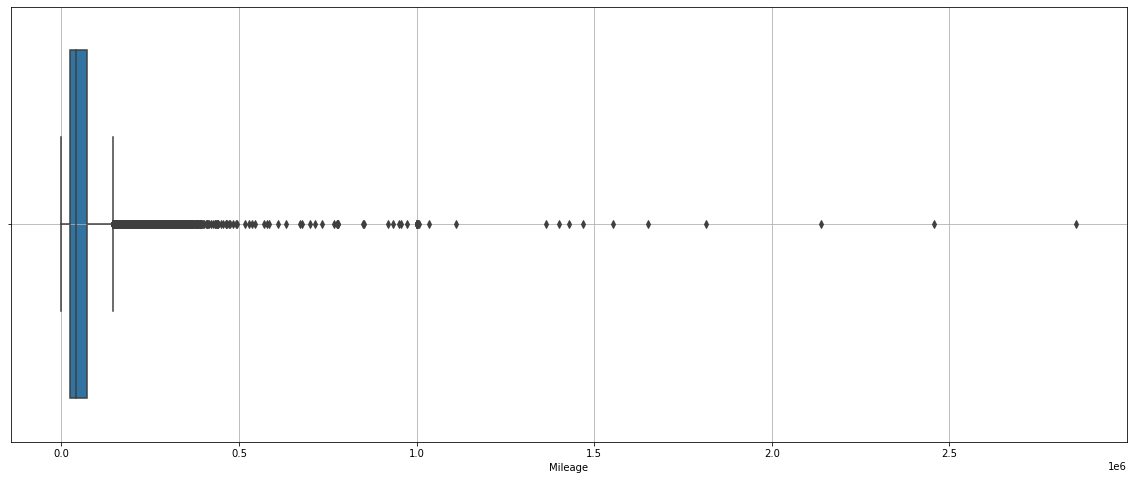

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(df["Mileage"])
plt.grid()

In [17]:
Q1,Q3 = np.percentile(df['Mileage'],[25,75])
Q1,Q3

(23836.0, 72186.0)

In [18]:
IQR = Q3 - Q1
IQR

48350.0

In [19]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-48689.0

In [20]:
upper_limit = Q3 + 1.5*IQR
upper_limit

144711.0

In [21]:
#Finding Outliers
df[(df.Mileage <= lower_limit) | (df.Mileage >= upper_limit)]

,Price,Year,Mileage,City,State,Vin,Make,Model
1179,4990,2008,159601,Boardman,OH,JH4CL96878C000866,Acura,TSX4dr
1240,5982,2008,158997,Cleveland,OH,JH4CL96868C006299,Acura,TSX4dr
1328,7795,2010,149122,West Nyack,NY,JH4CU2F64AC025040,Acura,TSX4dr
1395,9998,2011,146017,Lakeland,FL,JH4CU2F61BC014997,Acura,TSX4dr
1407,7125,2009,154566,Union City,GA,JH4CU26619C032460,Acura,TSX4dr
...,...,...,...,...,...,...,...,...
851712,3999,2004,154898,Longwood,FL,YV1SW64AX42429597,Volvo,V702.4L
851785,3998,2006,204001,Marietta,GA,YV4CY592861284131,Volvo,XC902.5L
851804,5000,1999,149857,Bremerton,WA,YV1LW55A2X2566891,Volvo,V70A
851925,3111,2001,202691,Odessa,TX,YV1SW61R512089006,Volvo,V702.4


In [22]:
#Removing Outliers
clean_df = df[(df.Mileage > lower_limit) & (df.Mileage < upper_limit)]
clean_df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

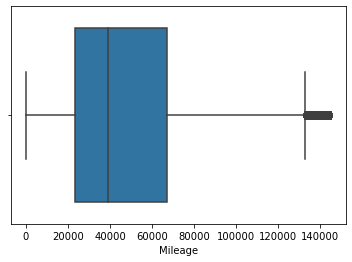

In [23]:
sns.boxplot(clean_df['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

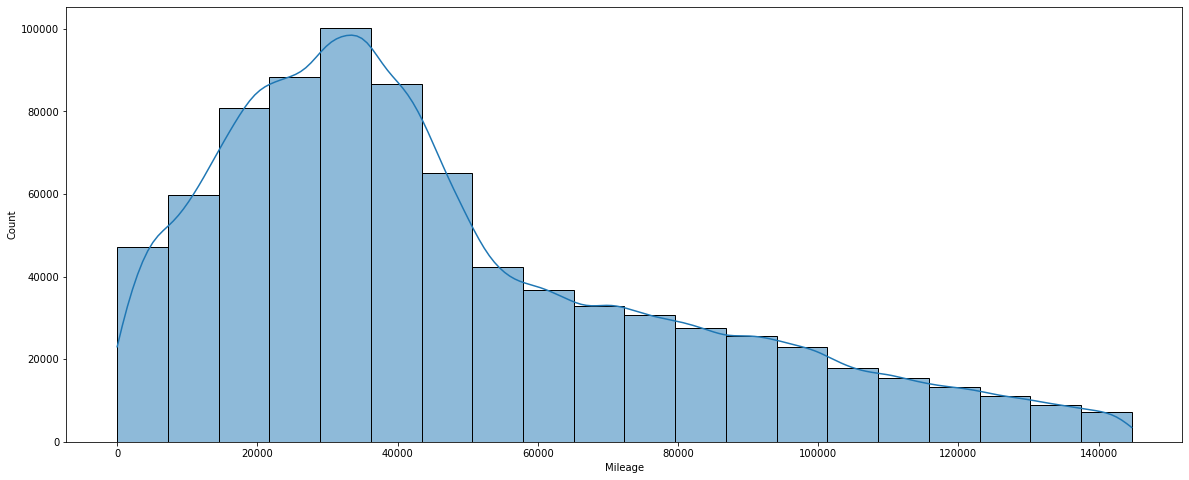

In [24]:
plt.figure(figsize=(20,8))
sns.histplot(clean_df['Mileage'],bins=20,kde=True)

In [25]:
make_name = clean_df.Make.value_counts().index
make_name

Index(['Ford', 'Chevrolet', 'Toyota', 'Nissan', 'Honda', 'Jeep', 'Hyundai',
       'Dodge', 'BMW', 'Kia', 'GMC', 'Mercedes-Benz', 'Volkswagen', 'Lexus',
       'Ram', 'Subaru', 'Chrysler', 'Cadillac', 'Mazda', 'Audi', 'Buick',
       'INFINITI', 'Acura', 'Lincoln', 'Volvo', 'MINI', 'Porsche', 'Land',
       'Mitsubishi', 'Scion', 'Jaguar', 'FIAT', 'Pontiac', 'Maserati',
       'Mercury', 'HUMMER', 'Saturn', 'smart', 'Bentley', 'Ferrari', 'Suzuki',
       'Tesla', 'Saab', 'Aston', 'Genesis', 'Lamborghini', 'Rolls-Royce',
       'Oldsmobile', 'Plymouth', 'McLaren', 'Isuzu', 'Alfa', 'Lotus', 'Fisker',
       'AM', 'Maybach', 'Freightliner', 'Geo'],
      dtype='object')

In [26]:
make_value = clean_df.Make.value_counts().values
make_value

array([105230,  97471,  73450,  64709,  47376,  39430,  35386,  32297,
        31966,  28378,  27241,  25918,  22930,  19616,  19579,  15972,
        15863,  14655,  13026,  12496,  12185,  11878,  10470,   6890,
         4896,   4348,   4077,   4022,   3904,   2919,   2183,   1780,
         1424,   1046,    899,    786,    786,    713,    367,    345,
          292,    231,    227,    149,    141,    121,     92,     76,
           48,     47,     46,     44,     42,     19,     19,     10,
           10,      2], dtype=int64)

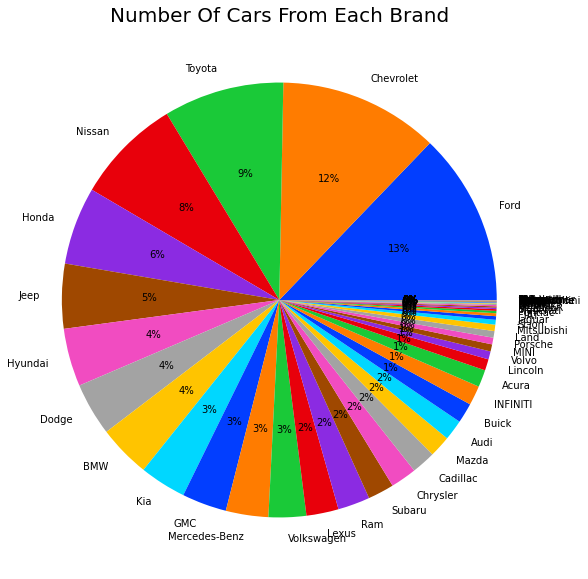

In [27]:
# Number Of Cars From Each Brand
plt.figure(figsize=(10,10))
colors = sns.color_palette('bright')
plt.title("Number Of Cars From Each Brand", fontsize = 20)
plt.pie(make_value, labels = make_name, colors = colors, autopct='%.0f%%')
plt.show()

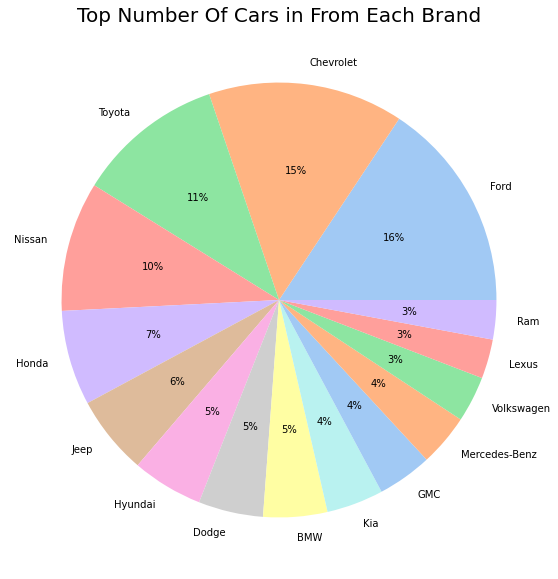

In [28]:
#top 15 cars in count
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')
ax = plt.pie(make_value[:15], labels = make_name[:15], colors = colors, autopct='%.0f%%')
plt.title("Top Number Of Cars in From Each Brand", fontsize = 20)
plt.show()

In [29]:
clean_df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

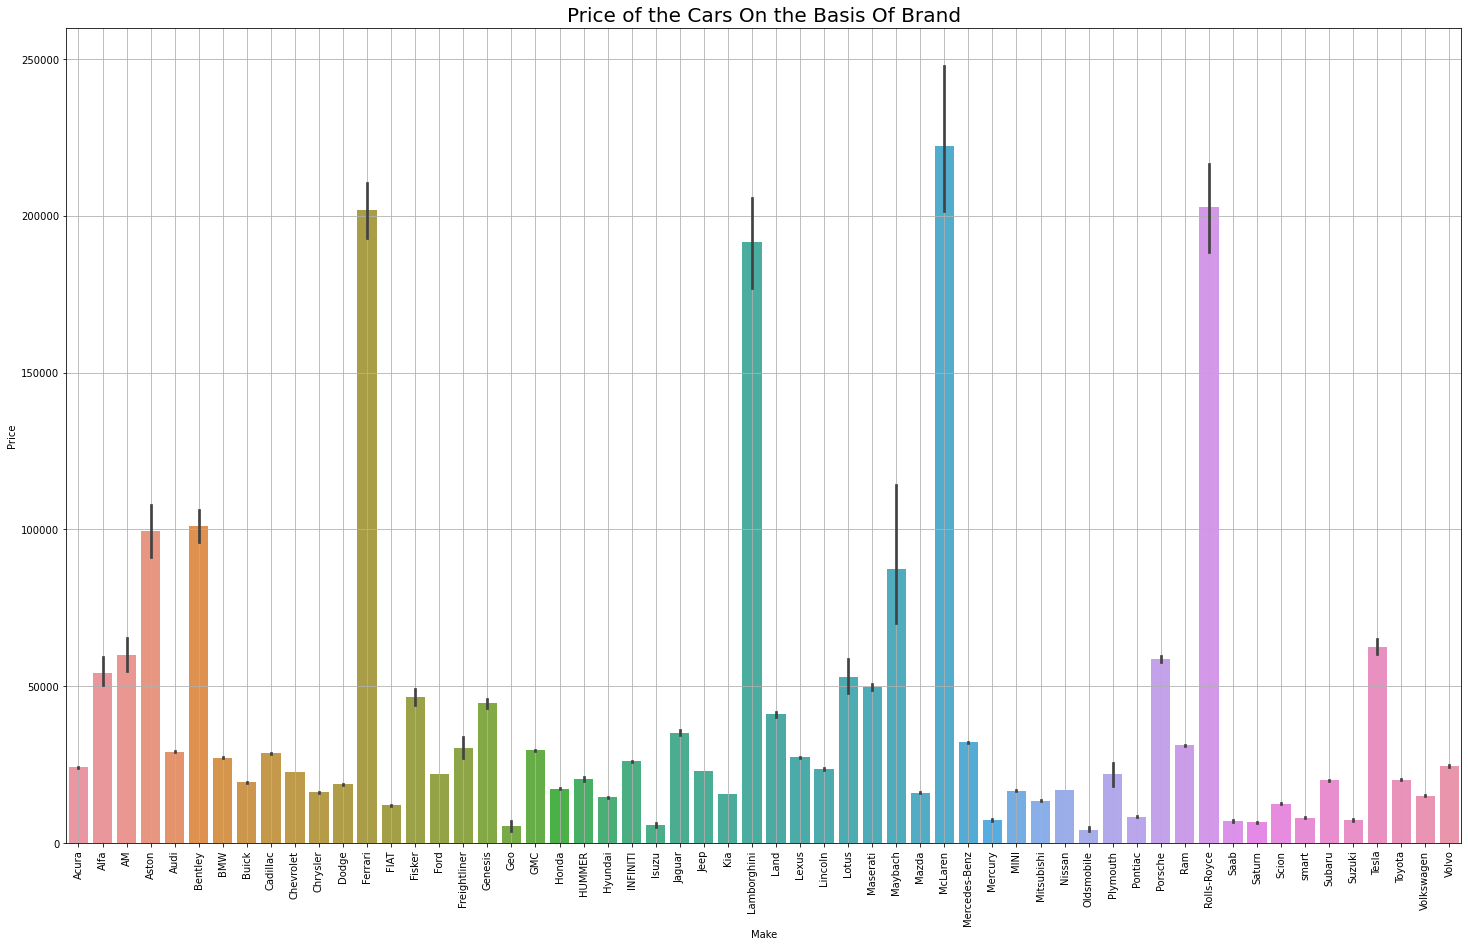

In [30]:
# Price comparison of different brands 

plt.figure(figsize=(25,15))
ax = sns.barplot(y='Price',x='Make', data=clean_df)
ax.set_title("Price of the Cars On the Basis Of Brand", fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.grid()
plt.show()

In [31]:
# Which state has most nomer of cars

State_name = clean_df.State.value_counts().index
State_name

Index([' TX', ' CA', ' FL', ' GA', ' IL', ' NC', ' VA', ' NY', ' PA', ' NJ',
       ' OH', ' AZ', ' WA', ' CO', ' TN', ' MA', ' MD', ' MO', ' IN', ' KY',
       ' AL', ' WI', ' CT', ' MN', ' OR', ' UT', ' MI', ' SC', ' OK', ' LA',
       ' KS', ' NV', ' AR', ' MS', ' NH', ' NM', ' NE', ' IA', ' ID', ' HI',
       ' DE', ' ME', ' RI', ' MT', ' AK', ' WV', ' SD', ' VT', ' ND', ' Fl',
       ' WY', ' Va', ' Md', ' Ga', ' ga', ' Az', ' Oh', ' Ca', ' DC'],
      dtype='object')

In [32]:
State_values = clean_df.State.value_counts().values
State_values

array([91299, 78496, 70768, 37779, 37393, 35694, 33257, 27701, 27416,
       26974, 22140, 21747, 21736, 21236, 17912, 17863, 17360, 15721,
       15601, 13060, 12595, 10842, 10695, 10388,  9834,  9820,  9788,
        9323,  9161,  8258,  7522,  6756,  6738,  5926,  5587,  4626,
        4546,  4534,  3139,  2873,  2388,  1901,  1855,  1817,  1611,
        1493,  1159,  1106,  1006,   765,   568,   247,   135,   105,
          99,    63,    49,    31,    21], dtype=int64)

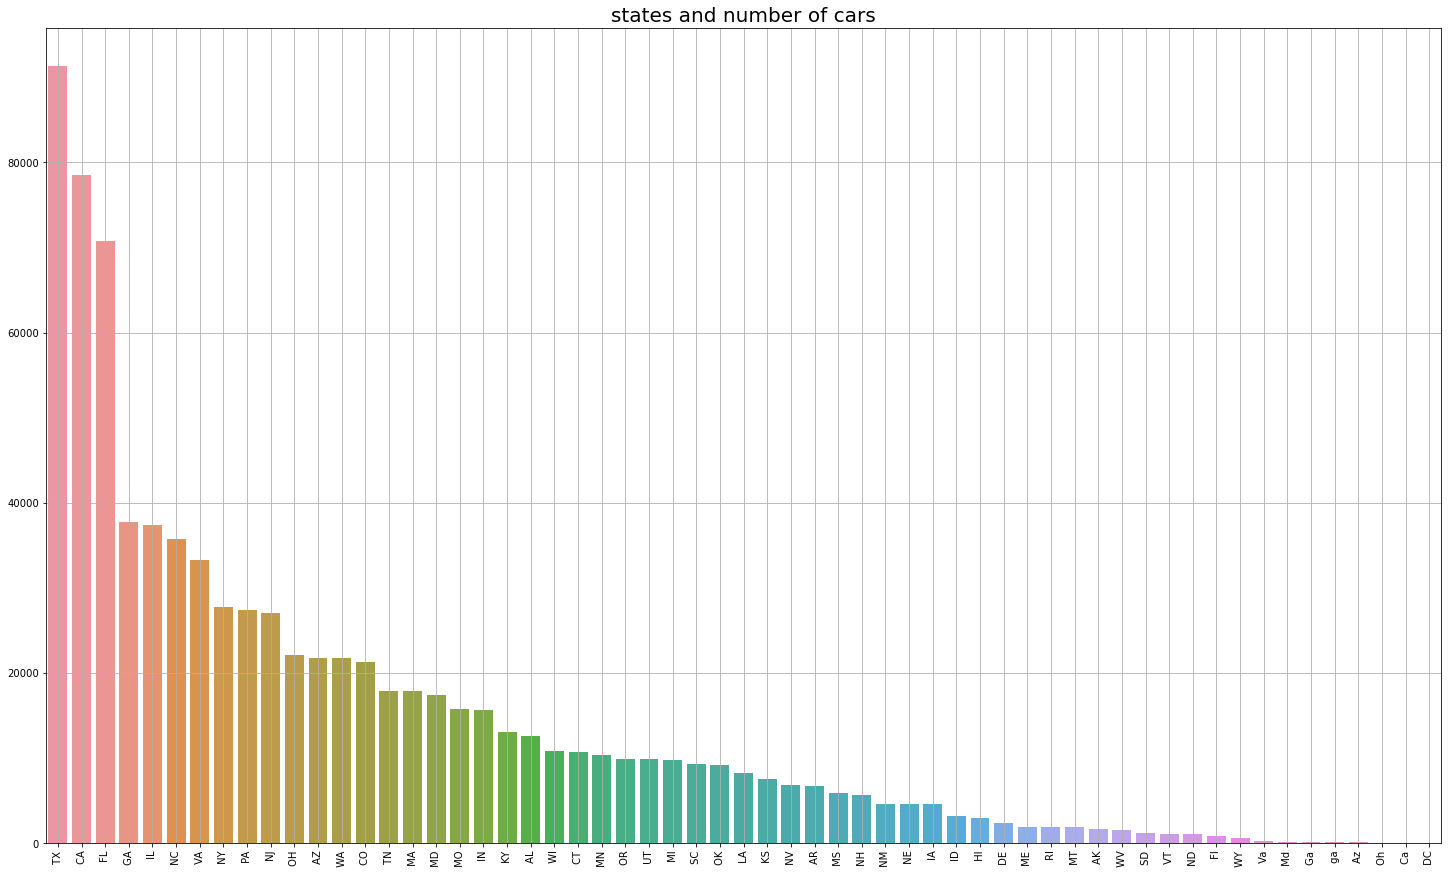

In [33]:
plt.figure(figsize=(25,15))
ax = sns.barplot(y=State_values,x=State_name)
ax.set_title("states and number of cars", fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.grid()
plt.show()

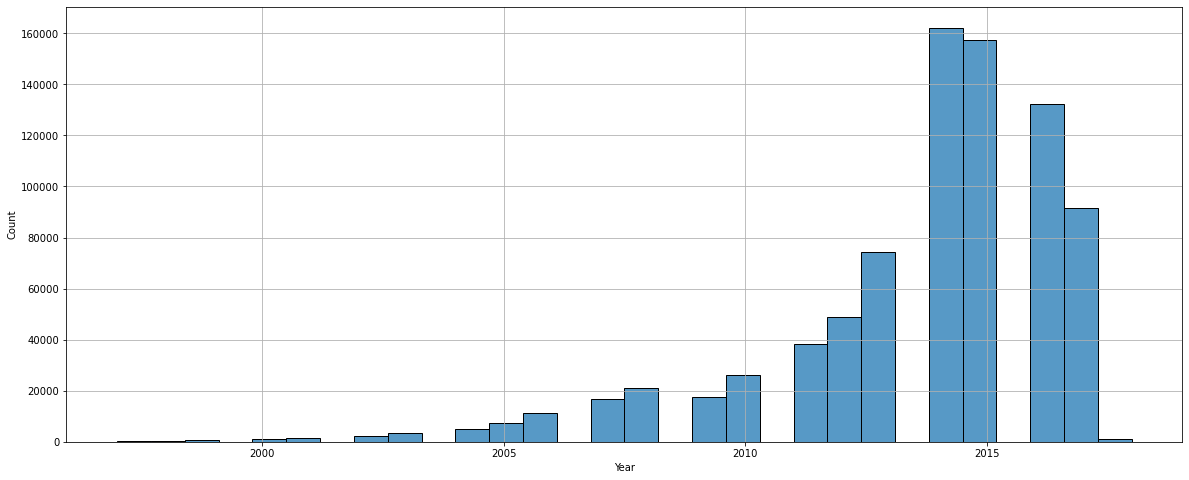

In [34]:
# Which Year period has most number of Cars

plt.figure(figsize=(20,8))
sns.histplot(clean_df['Year'],bins=30)
plt.grid()

In [35]:
clean_df[['Make','Model']].groupby(['Make','Model']).size().reset_index()

,Make,Model,0
0,AM,General,19
1,Acura,CLAutomatic,4
2,Acura,CLManual,1
3,Acura,CLType-S,8
4,Acura,ILX4dr,1
...,...,...,...
2695,smart,fortwoProxy,2
2696,smart,fortwoPure,33
2697,smart,fortwopassion,88
2698,smart,fortwoprime,2


In [36]:
NumberOfCars = clean_df.groupby('Make')['Model'].size().reset_index()
sorted_cars = NumberOfCars.sort_values(by=['Model'], ascending=False)
sorted_cars

,Make,Model
15,Ford,105230
9,Chevrolet,97471
54,Toyota,73450
41,Nissan,64709
21,Honda,47376
26,Jeep,39430
22,Hyundai,35386
11,Dodge,32297
5,BMW,31966
27,Kia,28378


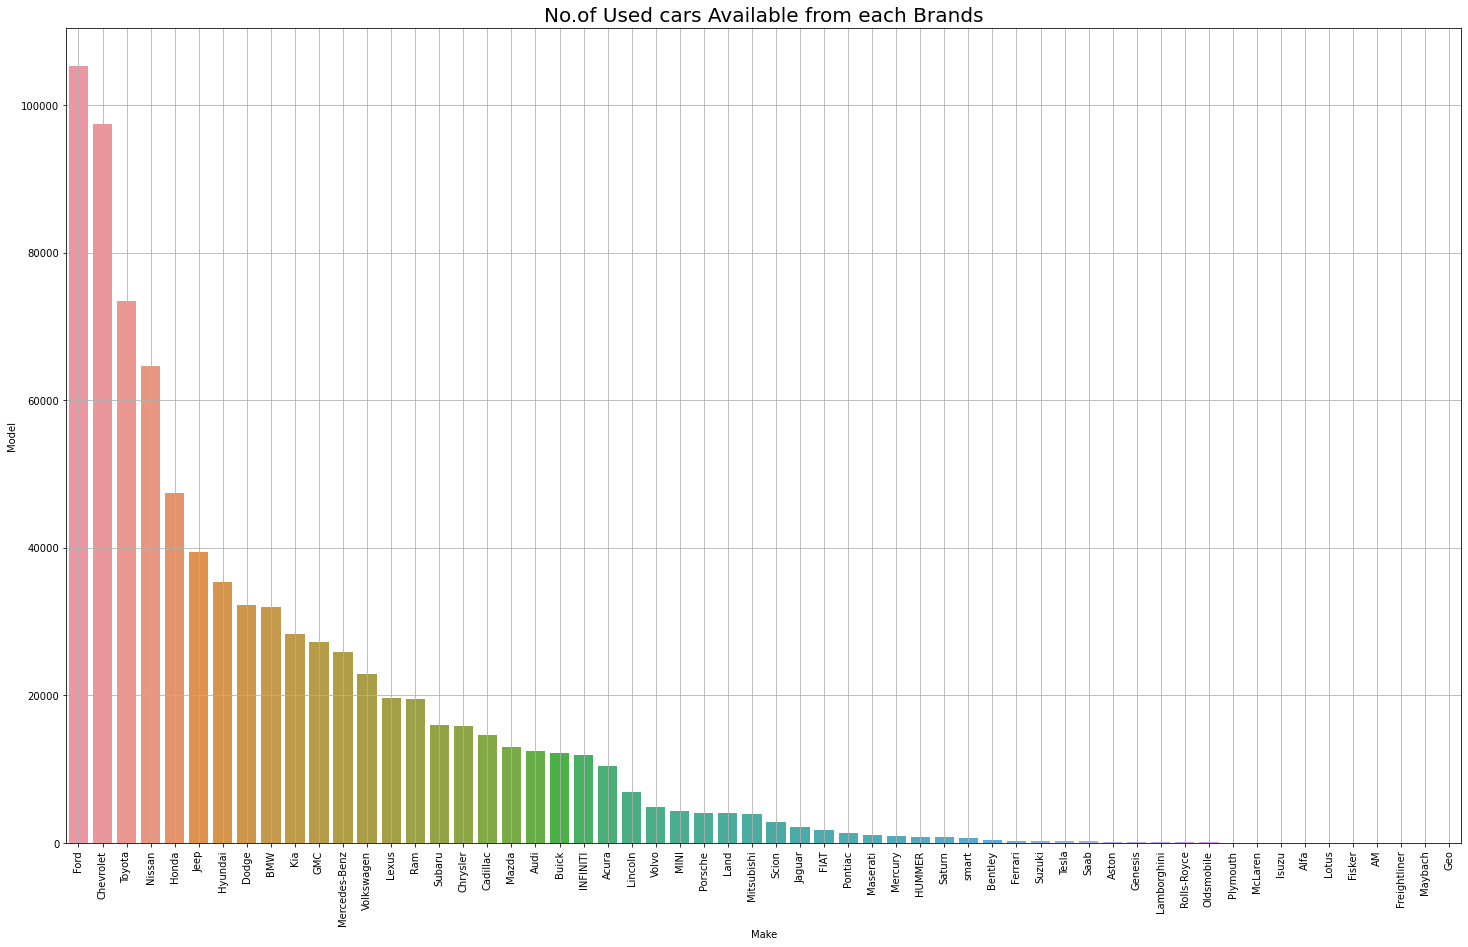

In [37]:
#No.of Used cars Available from each Brands

plt.figure(figsize=(25,15))
ax = sns.barplot(x='Make',y='Model',data=sorted_cars)
ax.set_title("No.of Used cars Available from each Brands", fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.grid()
plt.show()

In [38]:
clean_df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

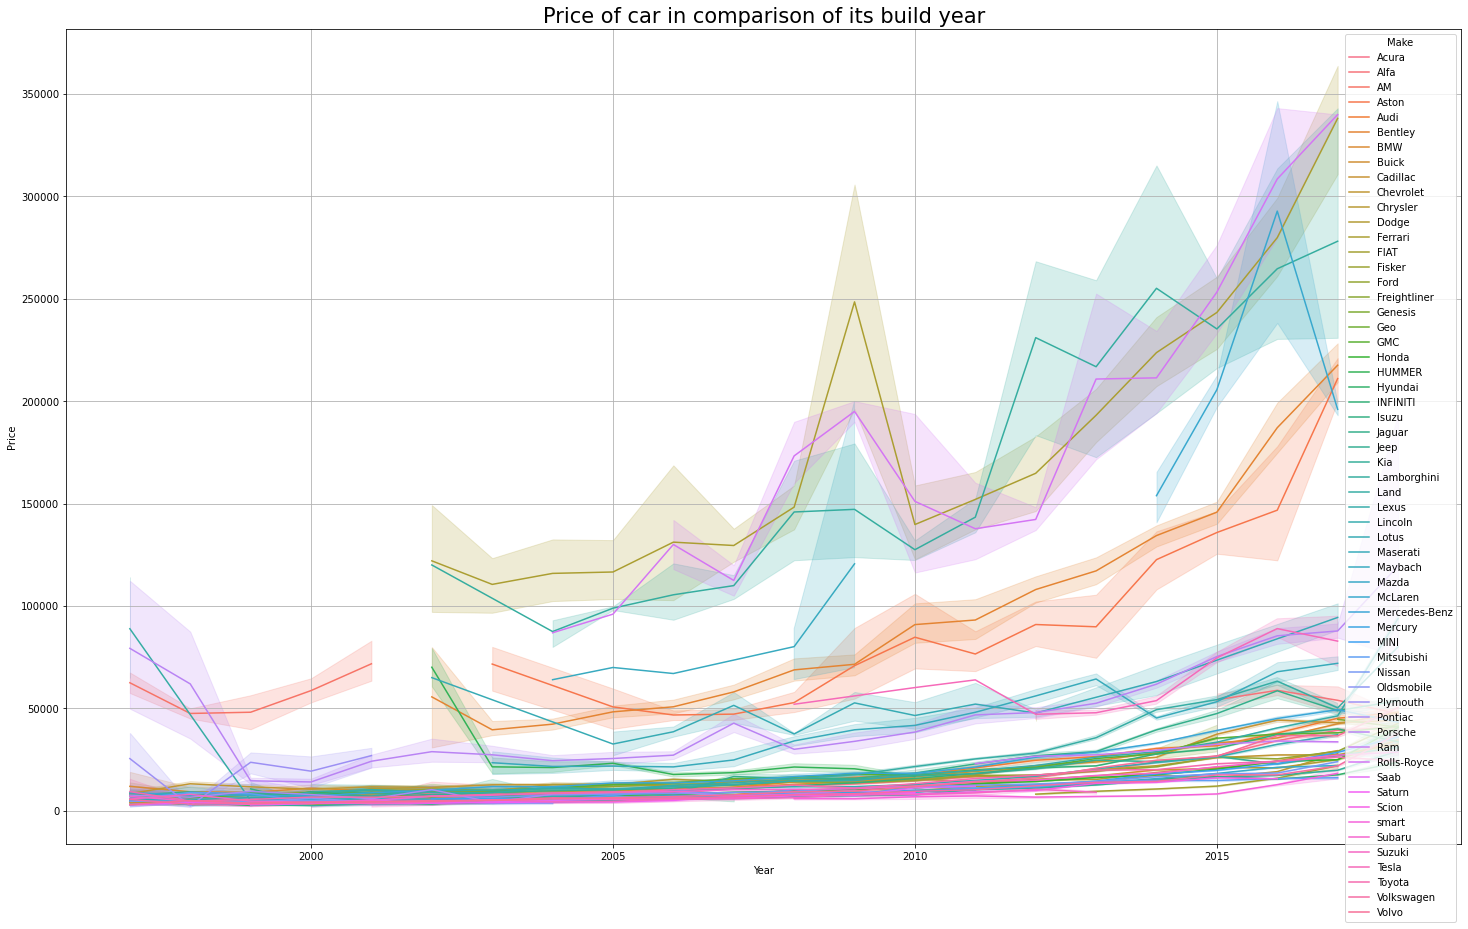

In [39]:
plt.figure(figsize=(25,15))
plt.title("Price of car in comparison of its build year",fontsize=21)
sns.lineplot(x='Year',y = 'Price',hue='Make', data =clean_df )
plt.grid()

C:\Users\hiran\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


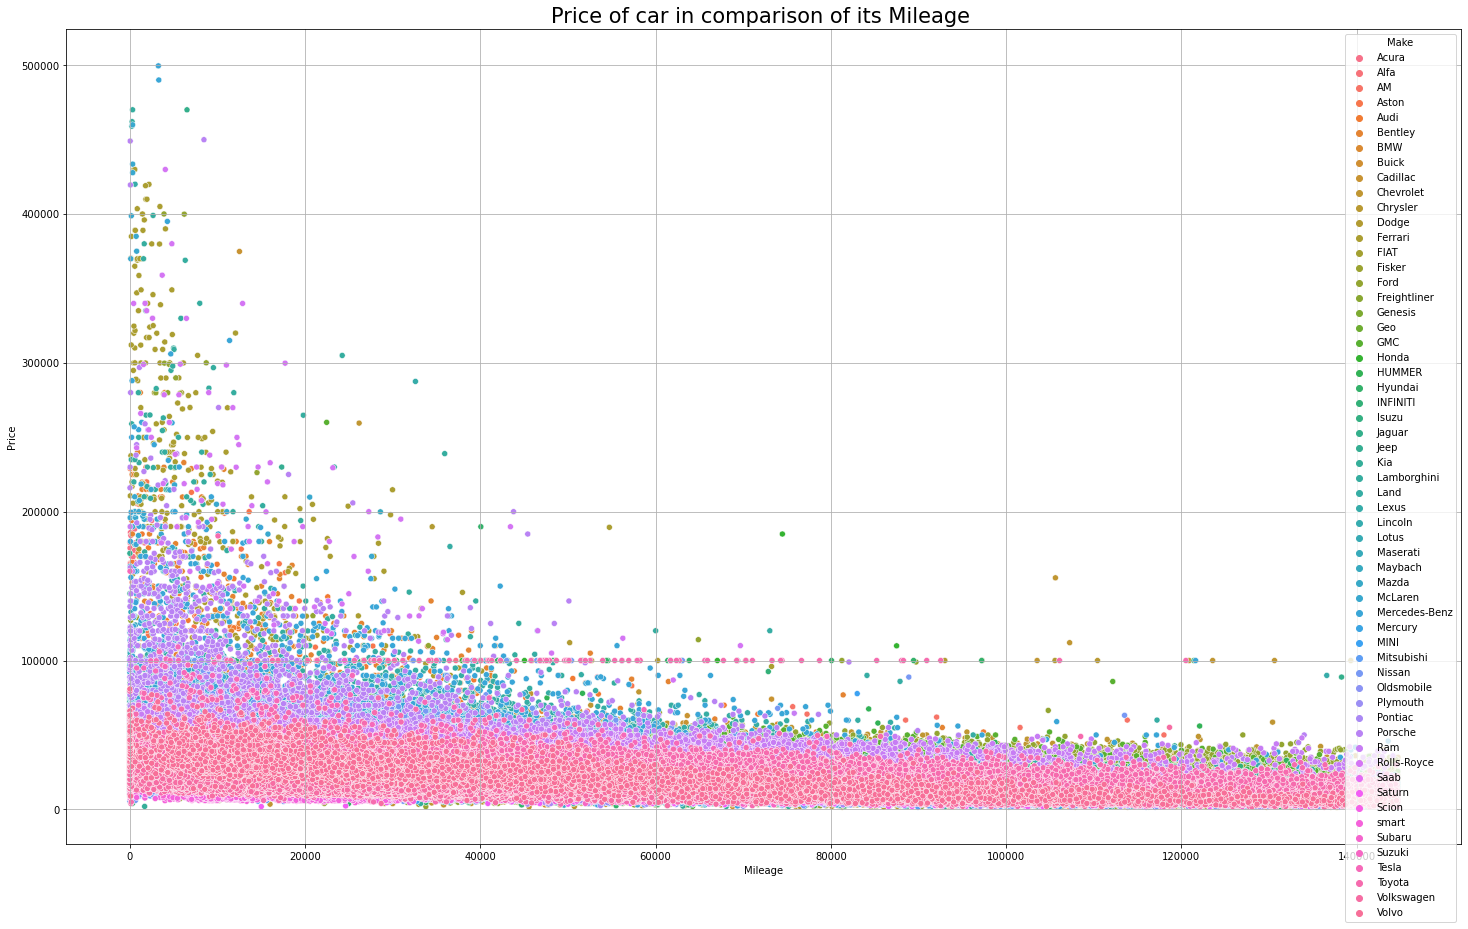

In [43]:
plt.figure(figsize=(25,15))
plt.title("Price of car in comparison of its Mileage ",fontsize=21)
sns.scatterplot(x='Mileage', y='Price',hue="Make",data=clean_df)
plt.grid()